In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pathlib import Path

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 300)

In [3]:
suj = 'antisacadas_91'
df = pd.read_csv(f'./raw_data/{suj}.csv')
df.head(5)

rt                                           stimulus  \
0   1006.0  \n    <div style="left: calc(50% - 400px); wid...   
1   7178.0                                                NaN   
2    709.0  \n    <div style="left: calc(50% - 400px); wid...   
3  46036.0                                                NaN   
4   5546.0  \n    <div style="left: calc(50% - 400px); wid...   

                                            response            trial_type  \
0                                                  0  html-button-response   
1  {"anteojos":"no","age":"33","hand":"derecha","...      survey-html-form   
2                                                  0  html-button-response   
3                                                NaN      virtual-chinrest   
4                                                  0  html-button-response   

   trial_index  time_elapsed internal_node_id  run_id  condition  \
0            0          1010          0.0-0.0      91          1   
1            1          8193          0.0-1.0      91          1   
2            2          8904          0.0-2.0      91          1   
3            3         54943          0.0-3.0      91          1   
4            4         60493          0.0-4.0      91          1   

           recorded_at               source_code_version  ip  \
0  2023-02-07 20:55:05  ba99e1b51ad05fbf3d7a37345e407160 NaN   
1  2023-02-07 20:55:05  ba99e1b51ad05fbf3d7a37345e407160 NaN   
2  2023-02-07 20:55:05  ba99e1b51ad05fbf3d7a37345e407160 NaN   
3  2023-02-07 20:55:05  ba99e1b51ad05fbf3d7a37345e407160 NaN   
4  2023-02-07 20:55:05  ba99e1b51ad05fbf3d7a37345e407160 NaN   

                                          user_agent  device browser  \
0  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  WebKit  Chrome   
1  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  WebKit  Chrome   
2  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  WebKit  Chrome   
3  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  WebKit  Chrome   
4  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...  WebKit  Chrome   

  browser_version platform  platform_version  item_width_mm  item_height_mm  \
0       107.0.0.0    Linux               NaN            NaN             NaN   
1       107.0.0.0    Linux               NaN            NaN             NaN   
2       107.0.0.0    Linux               NaN            NaN             NaN   
3       107.0.0.0    Linux               NaN           85.6           53.98   
4       107.0.0.0    Linux               NaN            NaN             NaN   

   item_width_px  px2mm  view_dist_mm  item_width_deg  px2deg  win_width_deg  \
0            NaN    NaN           NaN             NaN     NaN            NaN   
1            NaN    NaN           NaN             NaN     NaN            NaN   
2            NaN    NaN           NaN             NaN     NaN            NaN   
3          312.0   3.64        505.91         9.67142   32.26      52.076875   
4            NaN    NaN           NaN             NaN     NaN            NaN   

   win_height_deg success timeout failed_images failed_audio failed_video  \
0             NaN     NaN     NaN           NaN          NaN          NaN   
1             NaN     NaN     NaN           NaN          NaN          NaN   
2             NaN     NaN     NaN           NaN          NaN          NaN   
3       26.720397     NaN     NaN           NaN          NaN          NaN   
4             NaN     NaN     NaN           NaN          NaN          NaN   

  jspsych_start_time  load_time response_type key_press  avg_frame_time  \
0                NaN        NaN           NaN       NaN             NaN   
1                NaN        NaN           NaN       NaN             NaN   
2                NaN        NaN           NaN       NaN             NaN   
3                NaN        NaN           NaN       NaN             NaN   
4                NaN        NaN           NaN       NaN             NaN   

   center_x  center_y rastoc-type stimulus-coordina

In [84]:
def saccade_plot(df: pd.DataFrame, type_of_saccade: str) -> None:
    """Plot webcam eye tracking data

    Args:
        df (pd.DataFrame): Webcam eye-tracking data
        type_of_saccade (str): `prosaccade` or `antisaccade`
    """
    df_saccade = df.query("not webgazer_data.isnull() and typeOfSaccade == @type_of_saccade")
    webgazer_data = df_saccade['webgazer_data'].map(eval)

    for trial in range(len(webgazer_data)):
        t0 = df_saccade['intraEnd'].iloc[trial]
        tf =  df_saccade['fixEnd'].iloc[trial] # Deberia ser t0 - 200
        xs = np.array([i['x'] for i in webgazer_data.iloc[trial]])
        ys = np.array([i['y'] for i in webgazer_data.iloc[trial]])
        ts = np.array([i['t'] - t0 for i in webgazer_data.iloc[trial]])
        xbase = np.mean(xs[(ts>-200.0) & (ts<0.0)]) 
        # Restar el baseline (promedio de los 200 ms)
        xs = xs - xbase 
        # Normalize in range [a,b]
        xs_normalized = normalize_in_range(xs, -1, 1)
        plt.plot(ts, xs_normalized)

    plt.title(f'{type_of_saccade}\nN={len(webgazer_data)}\nsuj={suj}\n')
    plt.ylabel('x coordinate (pxs)')
    plt.xlabel('time (ms)')
    plt.xlim(-200, 1000)
    plt.show()

def normalize_in_range(values, a, b):
    """Normalize in range [a,b]"""
    values_normalized = []
    for i in range(len(values)):
        res = ( (b - a) * ((values[i] - np.min(values))) / (np.max(values) - np.min(values))) + a
        values_normalized.append(res)
    return np.array(values_normalized)

def pro_and_anti_plots(df, suj):
    saccade_plot(df, 'antisaccade')
    saccade_plot(df, 'prosaccade')

raw_data/antisacadas_98.csv
---------


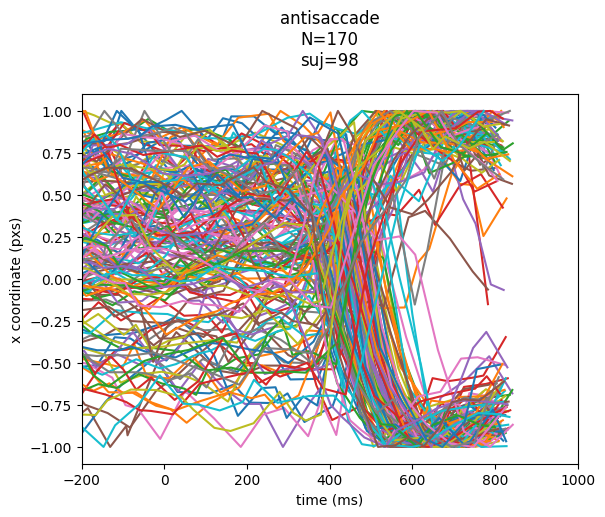

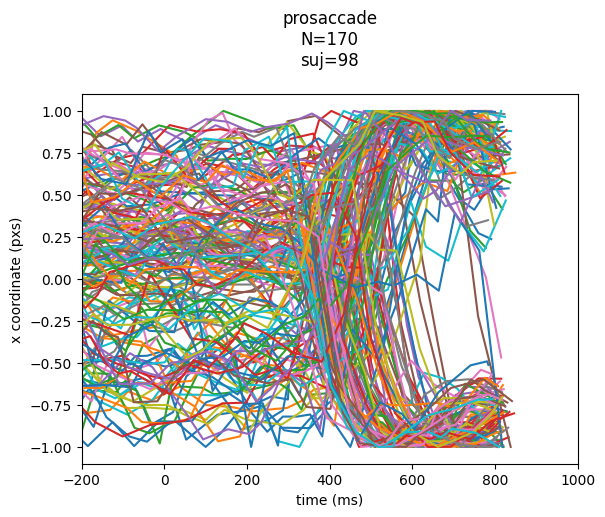

raw_data/antisacadas_91.csv
---------


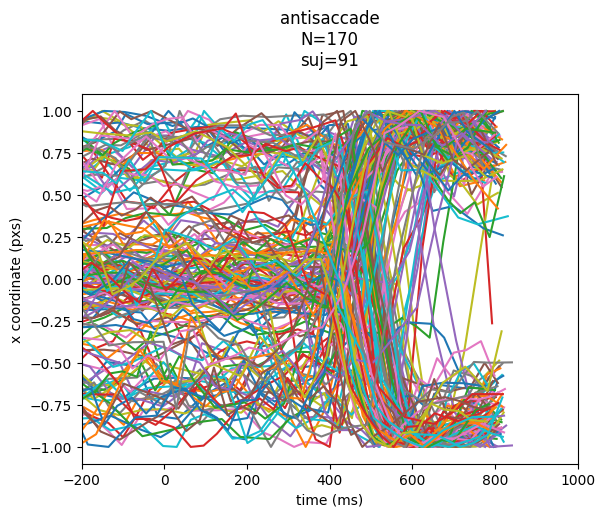

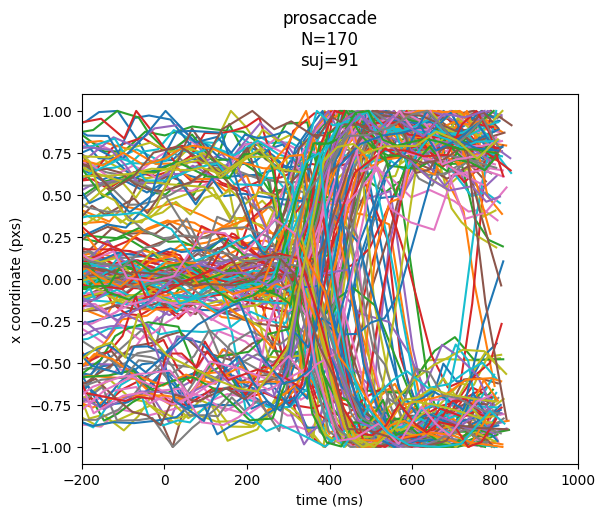

raw_data/antisacadas_102.csv
---------


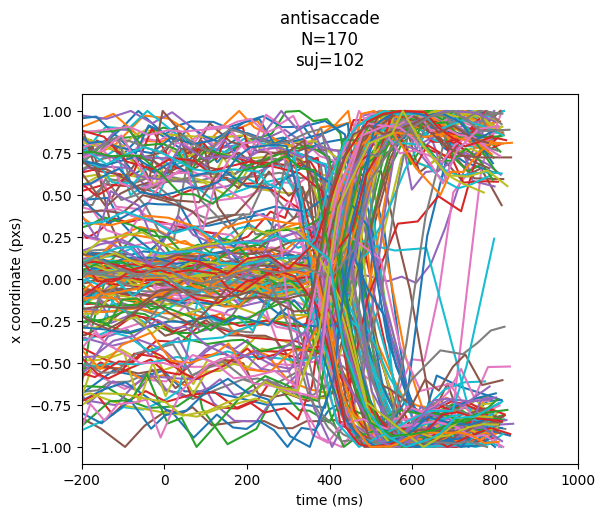

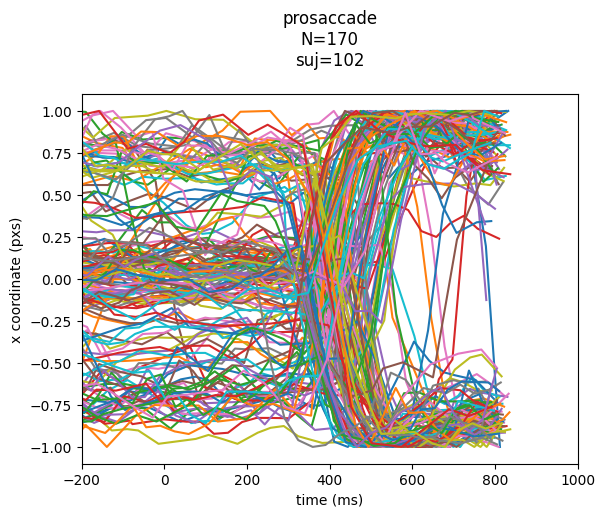

raw_data/antisacadas_92.csv
---------


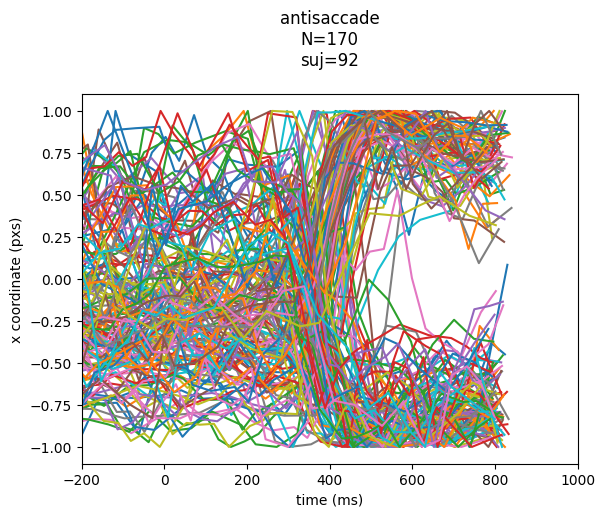

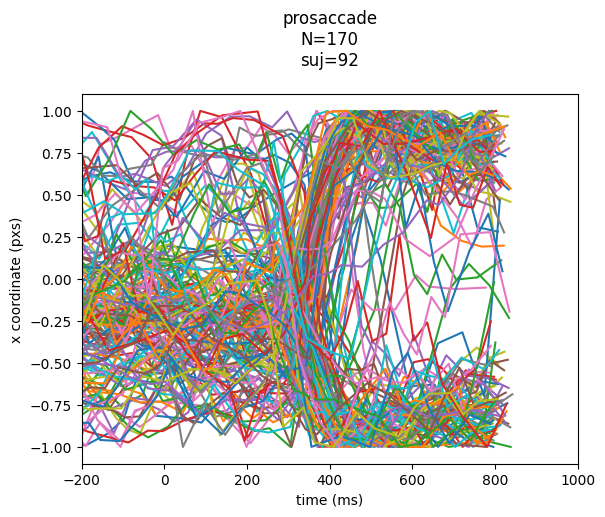

raw_data/antisacadas_99.csv
---------


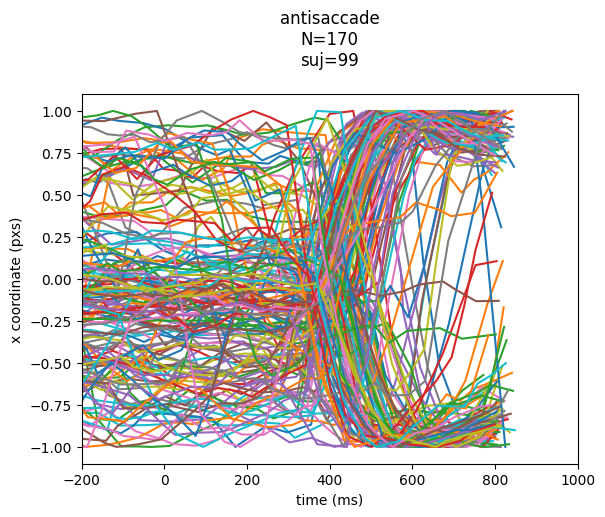

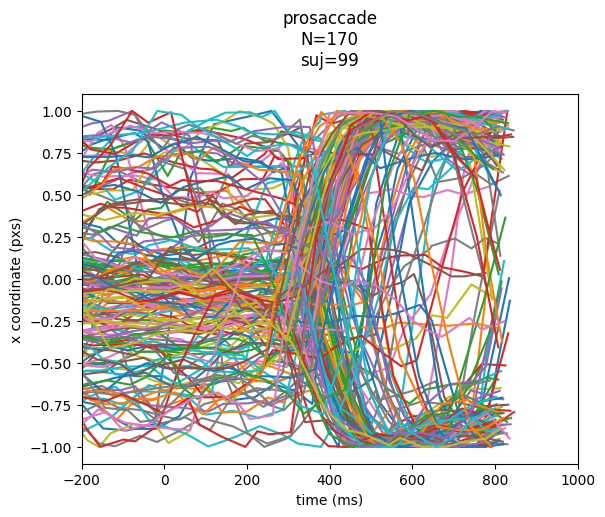

raw_data/antisacadas_101.csv
---------


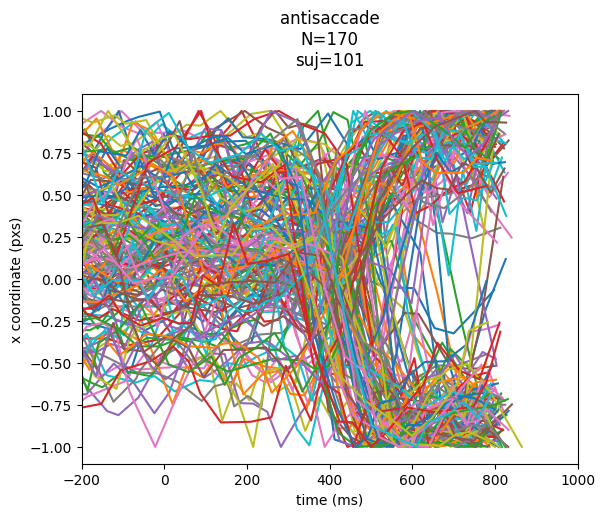

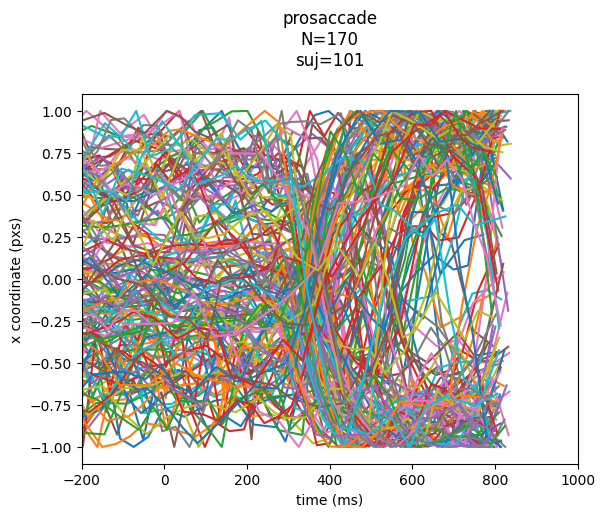

raw_data/antisacadas_100.csv
---------


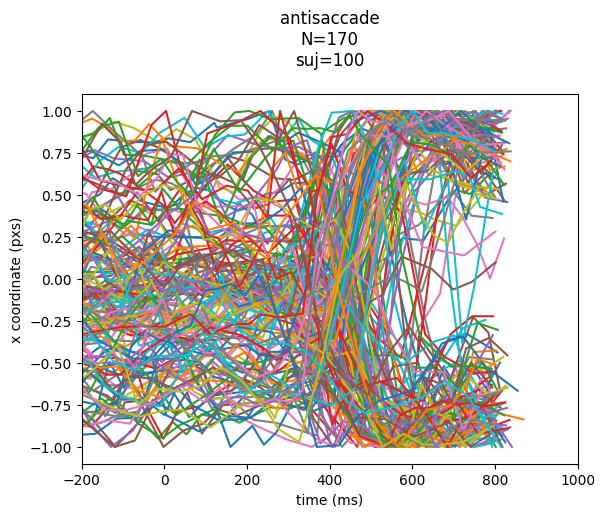

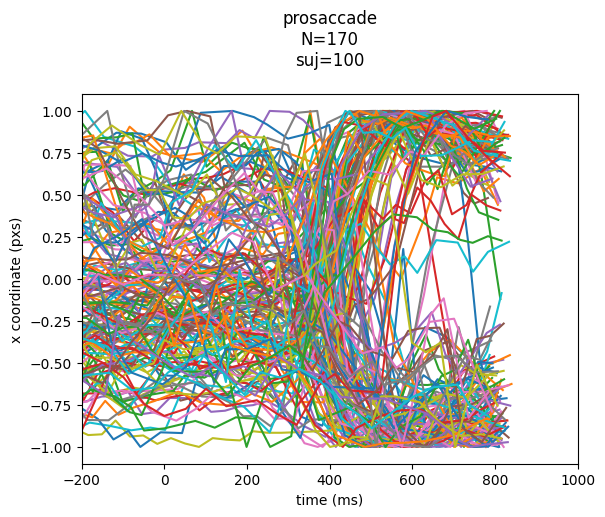

In [85]:
ALL_FILES_RAW = list(Path("./raw_data").glob("*.csv"))
for suj in ALL_FILES_RAW:
    print(suj)
    print('---------')
    df = pd.read_csv(suj)
    suj = str(suj).split('/')[-1].split('.')[0].split('_')[-1]
    pro_and_anti_plots(df, suj)

### Pruebas de filtrado

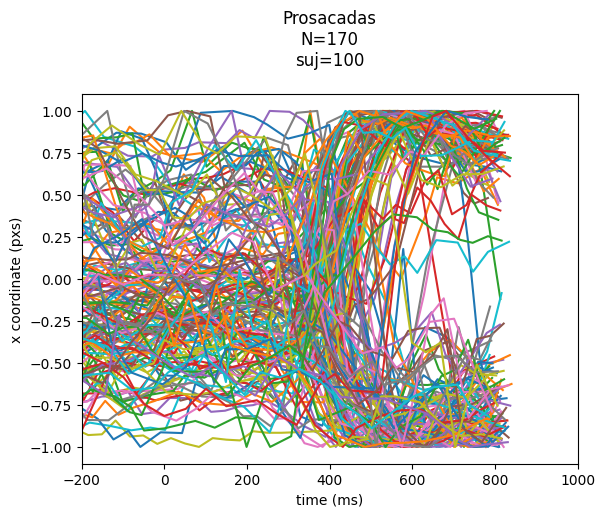

In [61]:
df_prosacadas = df.query("not webgazer_data.isnull() and typeOfSaccade == 'prosaccade'")

webgazer_data_prosacadas = df_prosacadas['webgazer_data'].map(eval)
for trial in range(len(webgazer_data_prosacadas)):
    t0 = df_prosacadas['intraEnd'].iloc[trial]
    tf =  df_prosacadas['fixEnd'].iloc[trial] # Deberia ser t0 - 200
    xs = np.array([i['x'] for i in webgazer_data_prosacadas.iloc[trial]])
    ys = np.array([i['y'] for i in webgazer_data_prosacadas.iloc[trial]])
    ts = np.array([i['t'] - t0 for i in webgazer_data_prosacadas.iloc[trial]])
    xbase = np.mean(xs[(ts>-200.0) & (ts<0.0)]) 
    xs = xs - xbase # Restar el baseline (promedio de los 200 ms)
    
    # Normalize in range [a,b]
    xs_normalized = normalize_in_range(xs, -1, 1)

    plt.plot(ts, xs_normalized)

plt.title(f'Prosacadas\nN={len(webgazer_data_prosacadas)}\nsuj={suj}\n')
plt.ylabel('x coordinate (pxs)')
plt.xlabel('time (ms)')
plt.xlim(-200, 1000)
plt.show()

In [41]:
lista = [1,2,3,4,20]
lista_normalized = []
for i in range(len(lista)):
    res = b - a * (((lista[i] - np.min(lista))) / (np.max(lista) - np.min(lista))) + a
    print('res:', res)
    lista_normalized.append(res)

print('lista', lista)
print('lista_normalized', lista_normalized)

res: 0.0
res: 0.05263157894736836
res: 0.10526315789473673
res: 0.1578947368421053
res: 1.0
lista [1, 2, 3, 4, 20]
lista_normalized [0.0, 0.05263157894736836, 0.10526315789473673, 0.1578947368421053, 1.0]


In [95]:
len(df_prosacadas['fixEnd'])

170

In [98]:
df_prosacadas

rt stimulus response     trial_type  trial_index  time_elapsed  \
36  NaN      NaN      NaN  psychophysics           36        167996   
37  NaN      NaN      NaN  psychophysics           37        171093   
38  NaN      NaN      NaN  psychophysics           38        174312   
39  NaN      NaN      NaN  psychophysics           39        177229   
40  NaN      NaN      NaN  psychophysics           40        180299   
41  NaN      NaN      NaN  psychophysics           41        183251   
42  NaN      NaN      NaN  psychophysics           42        186134   
43  NaN      NaN      NaN  psychophysics           43        189553   
44  NaN      NaN      NaN  psychophysics           44        192720   
45  NaN      NaN      NaN  psychophysics           45        196041   
80  NaN      NaN      NaN  psychophysics           80        269708   
81  NaN      NaN      NaN  psychophysics           81        272709   
82  NaN      NaN      NaN  psychophysics           82        275689   
83  NaN      NaN      NaN  psychophysics           83        278584   
84  NaN      NaN      NaN  psychophysics           84        281890   
85  NaN      NaN      NaN  psychophysics           85        285285   
86  NaN      NaN      NaN  psychophysics           86        288509   
87  NaN      NaN      NaN  psychophysics           87        291761   
88  NaN      NaN      NaN  psychophysics           88        294644   
89  NaN      NaN      NaN  psychophysics           89        297563   
90  NaN      NaN      NaN  psychophysics           90        300661   
91  NaN      NaN      NaN  psychophysics           91        304048   
92  NaN      NaN      NaN  psychophysics           92        307179   
93  NaN      NaN      NaN  psychophysics           93        310626   
94  NaN      NaN      NaN  psychophysics           94        313602   
95  NaN      NaN      NaN  psychophysics           95        316964   
96  NaN      NaN      NaN  psychophysics           96        319930   
97  NaN      NaN      NaN  psychophysics           97        323223   
98  NaN      NaN      NaN  psychophysics           98        326493   
99  NaN      NaN      NaN  psychophysics           99        329361   
122 NaN      NaN      NaN  psychophysics          122        400897   
123 NaN      NaN      NaN  psychophysics          123        403866   
124 NaN      NaN      NaN  psychophysics          124        406968   
125 NaN      NaN      NaN  psychophysics          125        409922   
126 NaN      NaN      NaN  psychophysics          126        412910   
127 NaN      NaN      NaN  psychophysics          127        416091   
128 NaN      NaN      NaN  psychophysics          128        419019   
129 NaN      NaN      NaN  psychophysics          129        422053   
130 NaN      NaN      NaN  psychophysics          130        425423   
131 NaN      NaN      NaN  psychophysics          131        428625   
132 NaN      NaN      NaN  psychophysics          132        431921   
133 NaN      NaN      NaN  psychophysics          133        435290   
134 NaN      NaN      NaN  psychophysics          134        438243   
135 NaN      NaN      NaN  psychophysics          135        441368   
136 NaN      NaN      NaN  psychophysics          136        444298   
137 NaN      NaN      NaN  psychophysics          137        447563   
138 NaN      NaN      NaN  psychophysics          138        450567   
139 NaN      NaN      NaN  psychophysics          139        453559   
140 NaN      NaN      NaN  psychophysics          140        456851   
141 NaN      NaN      NaN  psychophysics          141        459956   
205 NaN      NaN      NaN  psychophysics          205        593299   
206 NaN      NaN      NaN  psychophysics          206        596524   
207 NaN      NaN      NaN  psychophysics          207        599391   
208 NaN      NaN      NaN  psychophysics          208        602382   
209 NaN      NaN      NaN  psychophysics          209        605631   
210 NaN      NaN      NaN  ps

In [89]:
df_prosacadas

rt stimulus response     trial_type  trial_index  time_elapsed  \
36  NaN      NaN      NaN  psychophysics           36        167996   
37  NaN      NaN      NaN  psychophysics           37        171093   
38  NaN      NaN      NaN  psychophysics           38        174312   
39  NaN      NaN      NaN  psychophysics           39        177229   
40  NaN      NaN      NaN  psychophysics           40        180299   
41  NaN      NaN      NaN  psychophysics           41        183251   
42  NaN      NaN      NaN  psychophysics           42        186134   
43  NaN      NaN      NaN  psychophysics           43        189553   
44  NaN      NaN      NaN  psychophysics           44        192720   
45  NaN      NaN      NaN  psychophysics           45        196041   
80  NaN      NaN      NaN  psychophysics           80        269708   
81  NaN      NaN      NaN  psychophysics           81        272709   
82  NaN      NaN      NaN  psychophysics           82        275689   
83  NaN      NaN      NaN  psychophysics           83        278584   
84  NaN      NaN      NaN  psychophysics           84        281890   
85  NaN      NaN      NaN  psychophysics           85        285285   
86  NaN      NaN      NaN  psychophysics           86        288509   
87  NaN      NaN      NaN  psychophysics           87        291761   
88  NaN      NaN      NaN  psychophysics           88        294644   
89  NaN      NaN      NaN  psychophysics           89        297563   
90  NaN      NaN      NaN  psychophysics           90        300661   
91  NaN      NaN      NaN  psychophysics           91        304048   
92  NaN      NaN      NaN  psychophysics           92        307179   
93  NaN      NaN      NaN  psychophysics           93        310626   
94  NaN      NaN      NaN  psychophysics           94        313602   
95  NaN      NaN      NaN  psychophysics           95        316964   
96  NaN      NaN      NaN  psychophysics           96        319930   
97  NaN      NaN      NaN  psychophysics           97        323223   
98  NaN      NaN      NaN  psychophysics           98        326493   
99  NaN      NaN      NaN  psychophysics           99        329361   
122 NaN      NaN      NaN  psychophysics          122        400897   
123 NaN      NaN      NaN  psychophysics          123        403866   
124 NaN      NaN      NaN  psychophysics          124        406968   
125 NaN      NaN      NaN  psychophysics          125        409922   
126 NaN      NaN      NaN  psychophysics          126        412910   
127 NaN      NaN      NaN  psychophysics          127        416091   
128 NaN      NaN      NaN  psychophysics          128        419019   
129 NaN      NaN      NaN  psychophysics          129        422053   
130 NaN      NaN      NaN  psychophysics          130        425423   
131 NaN      NaN      NaN  psychophysics          131        428625   
132 NaN      NaN      NaN  psychophysics          132        431921   
133 NaN      NaN      NaN  psychophysics          133        435290   
134 NaN      NaN      NaN  psychophysics          134        438243   
135 NaN      NaN      NaN  psychophysics          135        441368   
136 NaN      NaN      NaN  psychophysics          136        444298   
137 NaN      NaN      NaN  psychophysics          137        447563   
138 NaN      NaN      NaN  psychophysics          138        450567   
139 NaN      NaN      NaN  psychophysics          139        453559   
140 NaN      NaN      NaN  psychophysics          140        456851   
141 NaN      NaN      NaN  psychophysics          141        459956   
205 NaN      NaN      NaN  psychophysics          205        593299   
206 NaN      NaN      NaN  psychophysics          206        596524   
207 NaN      NaN      NaN  psychophysics          207        599391   
208 NaN      NaN      NaN  psychophysics          208        602382   
209 NaN      NaN      NaN  psychophysics          209        605631   
210 NaN      NaN      NaN  ps